# Integrals

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Visualizing the Region of Integration

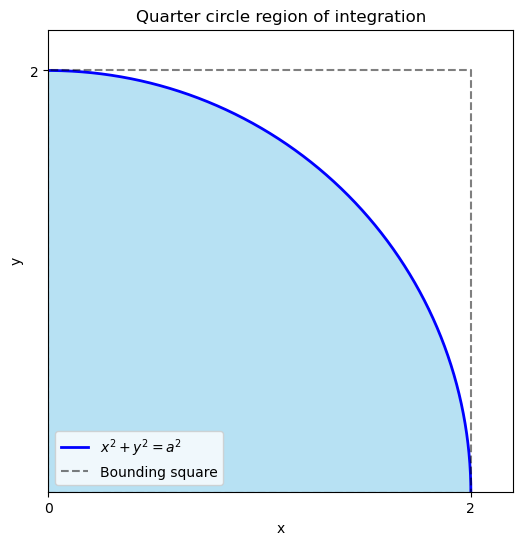

In [5]:
# Parameters
a = 2  # radius

# Create a grid
x = np.linspace(0, a, 400)
y = np.linspace(0, a, 400)
X, Y = np.meshgrid(x, y)

# Define the quarter circle region
region = X**2 + Y**2 <= a**2

# Plot
plt.figure(figsize=(6,6))

# Shade the region
plt.contourf(X, Y, region, levels=[0.5, 1], colors=['skyblue'], alpha=0.6)

# Plot the quarter circle boundary
theta = np.linspace(0, np.pi/2, 200)
plt.plot(a*np.cos(theta), a*np.sin(theta), 'b-', linewidth=2, label=r'$x^2+y^2=a^2$')

# Plot bounding box for reference
plt.plot([0,a,a,0,0], [0,0,a,a,0], 'k--', alpha=0.5, label='Bounding square')

# Labels and annotations
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quarter circle region of integration')
plt.axis('equal')

# Axes ticks and limits
plt.xlim(0, a+0.2)
plt.ylim(0, a+0.2)
plt.xticks([0, a])
plt.yticks([0, a])

# Legend
plt.legend()
plt.show()


### Visualizing the Solid of Integration

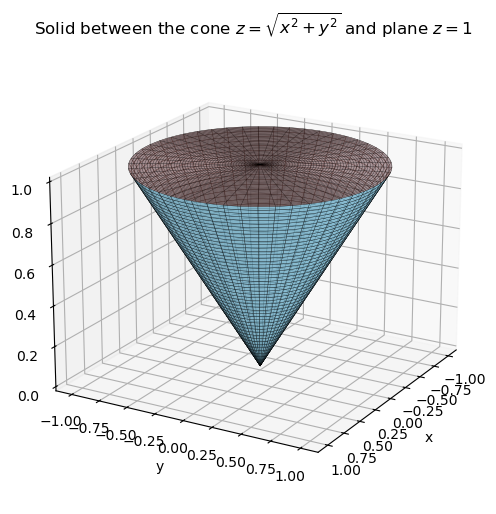

In [6]:

# Create theta and r grids for polar coordinates
theta = np.linspace(0, 2*np.pi, 100)
r = np.linspace(0, 1, 50)
R, Theta = np.meshgrid(r, theta)

# Convert to Cartesian
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Bottom surface: cone z = r
Z_cone = R

# Top surface: plane z = 1
Z_plane = np.ones_like(R)

# Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the cone surface
ax.plot_surface(X, Y, Z_cone, alpha=0.6, color='skyblue', edgecolor='k', linewidth=0.3)

# Plot the top plane (cap at z=1)
ax.plot_surface(X, Y, Z_plane, alpha=0.4, color='salmon', edgecolor='k', linewidth=0.3)

# Axes labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Solid between the cone $z=\\sqrt{x^2+y^2}$ and plane $z=1$")

# Set viewing angle
ax.view_init(elev=20, azim=30)

plt.show()


### Visualizing the 3D Region Defined by Inequalities

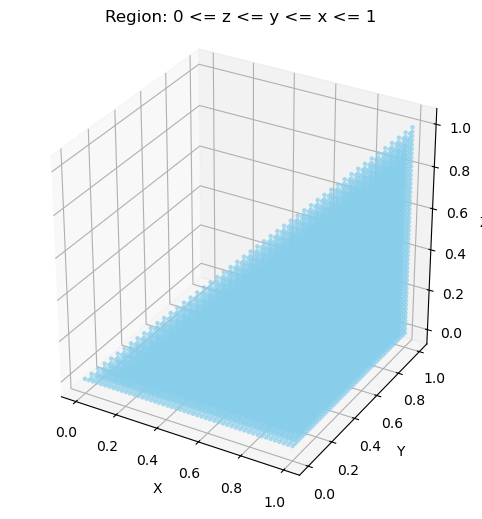

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid for x, y, z
N = 50
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
z = np.linspace(0, 1, N)
X, Y, Z = np.meshgrid(x, y, z)

# Define the region: 0 <= z <= y <= x <= 1
region = (Z <= Y) & (Y <= X)

# Extract points inside the region
X_region = X[region]
Y_region = Y[region]
Z_region = Z[region]

# Plot the region
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_region, Y_region, Z_region, color='skyblue', s=5, alpha=0.6)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Region: 0 <= z <= y <= x <= 1')
ax.set_box_aspect([1,1,1])  # Equal aspect ratio

plt.show()


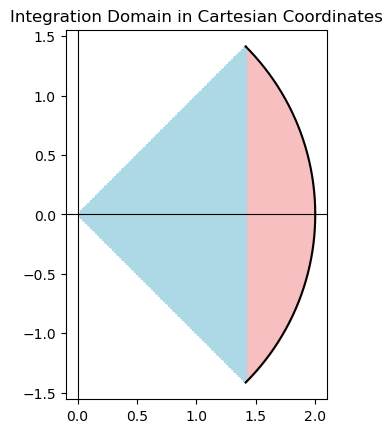

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# region 1: triangle (0 <= x <= sqrt(2), -x <= y <= x)
x1 = np.linspace(0, np.sqrt(2), 100)
for x in x1:
    plt.plot([x, x], [-x, x], color="lightblue")

# region 2: circular cap (sqrt(2) <= x <= 2, -sqrt(4-x^2) <= y <= sqrt(4-x^2))
x2 = np.linspace(np.sqrt(2), 2, 200)
y_upper = np.sqrt(4 - x2**2)
y_lower = -y_upper 
plt.fill_between(x2, y_lower, y_upper, color="lightcoral", alpha=0.5)

# Add quarter circle boundary
theta = np.linspace(-np.pi/4, np.pi/4, 300)
plt.plot(2*np.cos(theta), 2*np.sin(theta), 'k')

# Formatting
plt.axhline(0, color='k', linewidth=0.8)
plt.axvline(0, color='k', linewidth=0.8)
plt.gca().set_aspect('equal')
plt.title("Integration Domain in Cartesian Coordinates")
plt.show()


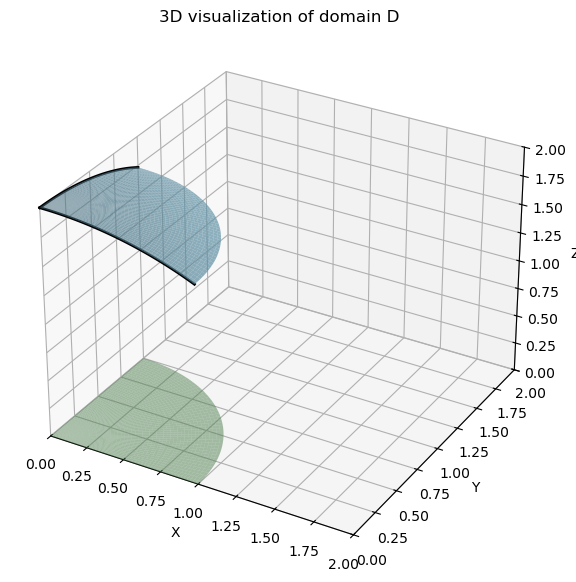

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid for phi and r (quarter cylinder base)
phi = np.linspace(0, np.pi/2, 50)  # first quadrant
r = np.linspace(0, 1, 50)
phi, r = np.meshgrid(phi, r)

# Top surface: hemisphere cap
z_top = np.sqrt(np.maximum(0, 4 - r**2))

# Cartesian coordinates for top
x_top = r * np.cos(phi)
y_top = r * np.sin(phi)

# Bottom surface: cylinder base at z=0
z_bottom = np.zeros_like(r)
x_bottom = x_top
y_bottom = y_top

# Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot top surface
ax.plot_surface(x_top, y_top, z_top, color='skyblue', alpha=0.7, rstride=1, cstride=1)

# Plot bottom surface
ax.plot_surface(x_bottom, y_bottom, z_bottom, color='lightgreen', alpha=0.5)

# Draw vertical edges (4 edges of quarter cylinder)
for angle in [0, np.pi/2]:
    x_edge = np.linspace(0, np.cos(angle), 50)
    y_edge = np.linspace(0, np.sin(angle), 50)
    r_edge = np.sqrt(x_edge**2 + y_edge**2)
    z_edge = np.sqrt(np.maximum(0, 4 - r_edge**2))
    ax.plot(x_edge, y_edge, z_edge, color='k', linewidth=2)

# Axes labels and limits
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(0, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D visualization of domain D')

plt.show()


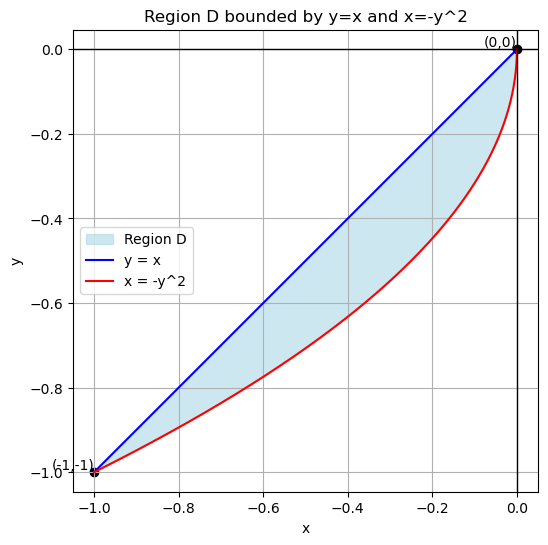

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the y-range for the region
y = np.linspace(-1, 0, 400)

# Curves
x_line = y            # Line: y = x
x_parabola = -y**2    # Parabola: x = -y^2

# Create the figure
plt.figure(figsize=(6,6))

# Fill the region between the curves
plt.fill_betweenx(y, x_parabola, x_line, color='lightblue', alpha=0.6, label='Region D')

# Plot the curves
plt.plot(x_line, y, color='blue', label='y = x')
plt.plot(x_parabola, y, color='red', label='x = -y^2')

# Mark intersection points
plt.scatter([0, -1], [0, -1], color='black')
plt.text(0, 0, "(0,0)", fontsize=10, verticalalignment='bottom', horizontalalignment='right')
plt.text(-1, -1, "(-1,-1)", fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Axes settings
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Region D bounded by y=x and x=-y^2")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
